# Part One

# Task 1

Data pre-processing and data exploration

In [943]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

# a. Use Pandas to load data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
#names = ['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality']
wine_data = pd.read_csv(url, delimiter=';')

# b. Merge all the data with “quality” labels between 6-10 into Class 1 and similarly form Class 2 for the data with “quality” labels between 1-5.
wine_data.quality.loc[(wine_data['quality'] >= 1) & (wine_data['quality'] <= 5)] = 2
wine_data.quality.loc[(wine_data['quality'] >= 6) & (wine_data['quality'] <= 10)] = 1

# c. Report the number of features and number of rows in each class
Class_1 = wine_data.loc[(wine_data['quality']) == 1]
Class_2 = wine_data.loc[(wine_data['quality']) == 2]

print("The number of rows and number of features for Class 1 are: ",Class_1.shape)
print("The number of rows and number of features for Class 2 are: ",Class_2.shape)

# d. Choose an attribute and generate a boxplot for the two pre-defined classes.
plt.style.use('bmh')


The number of rows and number of features for Class 1 are:  (855, 12)
The number of rows and number of features for Class 2 are:  (744, 12)


C:\Users\mekam\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<Figure size 576x396 with 0 Axes>

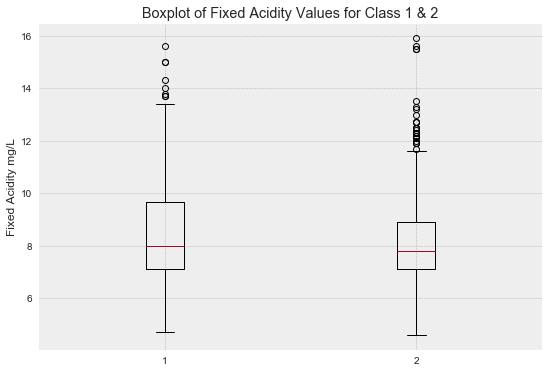

In [693]:
fig = plt.figure(1, figsize=(9,6))
class1 = wine_data['fixed acidity'][(wine_data['quality'] == 1)]
class2 = wine_data['fixed acidity'][(wine_data['quality'] == 2)]
data = (class1, class2)
plt.title('Boxplot of Fixed Acidity Values for Class 1 & 2')
plt.ylabel('Fixed Acidity mg/L') 
plt.boxplot(data)
plt.show()

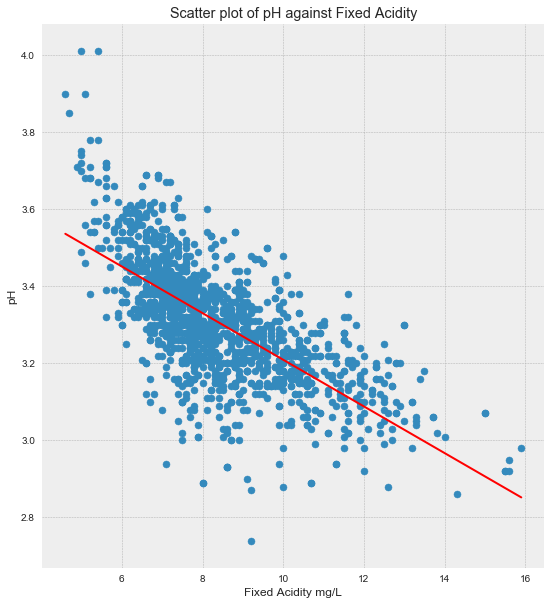

In [694]:
fig = plt.figure(1, figsize=(9,10))
plt.title('Scatter plot of pH against Fixed Acidity')
fixed_acidity = wine_data['fixed acidity']
pH = wine_data['pH']
plt.ylabel('pH')
plt.xlabel('Fixed Acidity mg/L') 
plt.scatter(fixed_acidity, pH)
plt.plot(np.unique(fixed_acidity), np.poly1d(np.polyfit(fixed_acidity, pH, 1))(np.unique(fixed_acidity)), color='red')

# Task 2

 Computing probabilities using Python code for the given red wine dataset

In [695]:
#Prior probability:

#Function for calculating probability
def probability(totalSampleSize, event):
    prob = len(event)/len(totalSampleSize)
    return prob

Class1 = wine_data.quality.loc[(wine_data['quality'] == 1)]
Class2 = wine_data.quality.loc[(wine_data['quality'] == 2)]

#i. What is the probability of a wine classified as Class 1 (P(Class 1))?
probability_class1 = probability(wine_data, Class1)

print("The probability of a wine classified as Class 1 (P(Class 1)):", probability_class1)

#ii. What is the probability of a wine classified as Class 2 (P(Class 2)
probability_class2 = probability(wine_data, Class2)

print("The probability of a wine classified as Class 2 (P(Class 2)):", probability_class2)

#Conditional probability: 

#i. What is the probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1))?
pHGreaterThan36 = wine_data.pH.loc[(wine_data['pH'] > 3.6)]

probability_pHGreaterThan36 = probability(wine_data, pHGreaterThan36)

pHGreaterThan36AndClass1 = wine_data.pH.loc[(wine_data['pH'] > 3.6) & wine_data['quality'] == 1]

probability_pHGreaterThan36AndClass1 = probability(wine_data, pHGreaterThan36AndClass1)

probability_pHGreaterThan36GivenClass1 = probability_pHGreaterThan36AndClass1/ probability_class1

print("The probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1)): ", probability_pHGreaterThan36GivenClass1)

#Posterior probability

#i. What is the probability of a wine classified as Class 1 when it has a pH value greater than 3.6?
probability_Class1WhenpHIsGreaterThan36 = (probability_pHGreaterThan36GivenClass1) * (probability_class1) / (probability_pHGreaterThan36) 

probability_Class1WhenpHIsGreaterThan361 = (probability_pHGreaterThan36GivenClass1) * (probability_class1) / (probability_pHGreaterThan36) 

print("The probability of a wine classified as Class 1 when it has a pH value greater than 3.6: ",probability_Class1WhenpHIsGreaterThan36)

The probability of a wine classified as Class 1 (P(Class 1)): 0.5347091932457786
The probability of a wine classified as Class 2 (P(Class 2)): 0.4652908067542214
The probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1)):  0.029239766081871343
The probability of a wine classified as Class 1 when it has a pH value greater than 3.6:  0.5208333333333333


# Part Two

# Task 1

In [916]:
# Divide the data set into a training set (I) and a test set. Usually, we use 20%-30% of the total
#data points as the test data. It is your choice on how to set the exact ratio. But you need make it clear
#in your report. You should further divide the training set (I) into a smaller training set (II)and a
#validation set using the same ratio.

from sklearn.model_selection import train_test_split


columns = len(wine_data.columns)

# Separating out the features
inputs = wine_data.iloc[:, 0:columns - 1]

# Separating out the target
target = wine_data.iloc[:, columns -1 :columns]

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=421, shuffle=True)

X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=421, shuffle=True)

# Task 2: PCA Analysis on the red-wine two classes dataset

In [917]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardizing the features
x = StandardScaler().fit_transform(X_train)


#a) Perform a PCA analysis on the training data set (I)
pca = PCA(n_components=11)

proj_wine_data = pca.fit_transform(x)

principalDf = pd.DataFrame(data = proj_wine_data , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11'])
finalDf = pd.concat([principalDf['principal component 1'], principalDf['principal component 2'], y_train], axis = 1)

In [918]:
#y_train.reset_index(drop= True, inplace=True)

In [952]:
# b) Plot the training data in the PC1 and PC2 projection and label the data in the picture according to
# its class.

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component 1 vs Principal Component 2', fontsize = 20)

targets = [1, 2]
colors = ['r','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [920]:
# c) Report variances captured by each principal component 
pca.explained_variance_ratio_

array([0.28131526, 0.17687754, 0.142445  , 0.10818308, 0.08640271,
       0.05925591, 0.05331672, 0.03939426, 0.03100737, 0.01631591,
       0.00548625])

# Task 3: Do a classification using the logistic regression model

In [921]:
#b) Producing a learning curve of the number of principal components against the accuracy rate. The
#accuracy rate should be measured on both the training set (II) and the validation set

def misPatterns(predictions, labels):
    i = 0 
    num1 = 0 
    num2 = 0
    for label in labels:
        if(label == 1):
            if(label != predictions[i]):
                num1 = num1 + 1
        if(label == 2):
            if(label != predictions[i]):
                num2 = num2 + 1     
        i = i + 1 
    print("The number of misclassified patterns whose label is 1 but prediction is 2: " , num1)
    print("The number of misclassified patterns whose label is 2 but prediction is 1: " , num2)
    return num1, num2

def DftoArray(dataframe):
    a = dataframe.to_numpy()
    b = a.flatten()
    return b

y_test_Array = DftoArray(y_test)

In [953]:
#c) Train the model on the training set and report the performance on the test set including accuracy
#rate and results obtained using the misPatterns function you have defined in b).

from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)

scaled_trainX = scaler.transform(X_train)
scaled_testX = scaler.transform(X_test)

logreg = LogisticRegression(solver = 'saga', penalty='l2', C= 1.0, l1_ratio= 0.8, tol = 0.000001, max_iter= 1000000000, random_state= 411, warm_start= True)

logreg.fit(scaled_trainX, y_train)

y_pred = logreg.predict(scaled_testX)

print("Accuracy rate of the model is:", metrics.accuracy_score(y_test, y_pred))

Accuracy rate of the model is: 0.740625


C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [923]:
misPatterns(y_pred, y_test_Array)

The number of misclassified patterns whose label is 1 but prediction is 2:  36
The number of misclassified patterns whose label is 2 but prediction is 1:  47


(36, 47)

# Task 4: Investigate how the size of the training dataset affects the model performance on the test set

In [937]:
#a) Produce a learning curve of the size of training set (II) against the accuracy rate. The accuracy rate should be measured on both the training set and the validation set 

accuracy_values_trn = []
accuracy_values_val = []
training_sizes = []

def trainingDataIncrementer():
    
    for x in range(2, 805, 1):
        a = x /1000
        
        X_trn_01, X_val_01, y_trn_01, y_val_01 = train_test_split(X_trn, y_trn, train_size= a, test_size=0.2, random_state=421, shuffle=True)
    
        training_sizes.append(a)
        
        scaled_trainX_01 = scaler.transform(X_trn_01)
        scaled_X_val_01 = scaler.transform(X_val_01)
    
        logreg.fit(scaled_trainX_01, y_trn_01)
        y_pred_trn_01 = logreg.predict(scaled_trainX_01)
        y_pred_val_01 = logreg.predict(scaled_X_val_01)
    
        accuracy_pred_trn = metrics.accuracy_score(y_pred_trn_01, y_trn_01)
        accuracy_pred_val = metrics.accuracy_score(y_pred_val_01, y_val_01)
    
        accuracy_values_trn.append(accuracy_pred_trn)
        accuracy_values_val.append(accuracy_pred_val)


In [938]:
trainingDataIncrementer()

C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

ValueError: The sum of test_size and train_size = 1.0010000000000001, should be in the (0, 1) range. Reduce test_size and/or train_size.

In [939]:
from scipy.interpolate import spline

fig = plt.figure(1, figsize=(12,10))
plt.style.use('seaborn')

x = np.linspace(0.002, 0.8, 796)
y = spline(training_sizes, accuracy_values_trn, x)
z = spline(training_sizes, accuracy_values_val, x)

plt.plot(x, y, label= 'Training Set II')
plt.plot(x, z, label= 'Validation Set')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy rate', fontsize= 14)
plt.xlabel('Size of Dataset', fontsize= 14)
plt.title('Learning curve of dataset against accuracy rate')
plt.legend()

C:\Users\mekam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  import sys
C:\Users\mekam\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


In [909]:
# c) Report the performance on the test set obtained using the model trained from the best size 

X_trn_best, X_val_best, y_trn_best, y_val_best = train_test_split(X_trn, y_trn, train_size= 0.6, test_size = 0.2, random_state=421, shuffle=True)

scaled_trainX_best = scaler.transform(X_trn_best)
scaled_X_test = scaler.transform(X_test)
    
logreg.fit(scaled_trainX_best, y_trn_best)
y_pred_trn_best = logreg.predict(scaled_trainX_best)
y_pred_test = logreg.predict(scaled_X_test)
    
accuracy_pred_best = metrics.accuracy_score(y_pred_trn_best, y_trn_best)
accuracy_pred_test = metrics.accuracy_score(y_pred_test, y_test)

print("The accuracy rate with training set of size 0.6 is:",accuracy_pred_best)
print("The accuracy rate of the test set on the model trained from the best size is",accuracy_pred_test)


The accuracy rate with training set of size 0.6 is: 0.7569331158238173
The accuracy rate of the test set on the model trained from the best size is 0.7375


C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Task 5: Investigate how the number of features extracted from PCA affects the model performance on the test set

In [891]:
#a) Perform a PCA analysis on the training data set (II) and obtained projected training set. (2 marks)

scaled_X_trn_pca = StandardScaler().fit_transform(X_trn)

from sklearn.decomposition import PCA

pca = PCA(n_components=11)

proj_wine_data_X_trn = pca.fit_transform(scaled_X_trn_pca)

principalDf = pd.DataFrame(data = proj_wine_data_X_trn , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11'])

In [964]:
#b) Producing a learning curve of the number of principal components against the accuracy rate. The
#accuracy rate should be measured on both the training set (II) and the validation set

#Get the PCA data.

accuracy_values_trn_pca = []
accuracy_values_val_pca = []
components = []


def pcaComponentIncrementer ():

    for x in range(0, 11, 1):
        x_trn_scaled = StandardScaler().fit_transform(X_trn)
        pca_model = decomposition.PCA(n_components=x)
        components.append(x)
        pca_model.fit(x_trn_scaled)
        pca_data = pd.DataFrame(pca_model.transform(x_trn_scaled))

        if 'intercept' in pca_data:
            continue
        else:
            pca_data['intercept'] = 1.0

        x_train, x_val, y_train, y_val = train_test_split(pca_data, y_trn, test_size=0.2, random_state=421, shuffle=True)

        logreg_model = LogisticRegression().fit(x_train, y_train)
   
        y_predict_train = logreg_model.predict(x_train)
        y_predict_val = logreg_model.predict(x_val)
    
        accu_train = metrics.accuracy_score(y_predict_train, y_train)
        accu_val =  metrics.accuracy_score(y_predict_val, y_val)
    
        accuracy_values_trn_pca.append(accu_train)
        accuracy_values_val_pca.append(accu_val)
    
    

In [965]:
pcaComponentIncrementer()

C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\linear_

In [966]:
#Plotting the learning curves

fig = plt.figure(1, figsize=(12,10))
plt.style.use('seaborn')

plt.plot(components, accuracy_values_trn_pca, label= 'Training Set II')
plt.plot(components, accuracy_values_val_pca, label= 'Validation Set')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy rate', fontsize= 14)
plt.xlabel('PCA Components', fontsize= 14)
plt.title('Learning curve of dataset against accuracy rate')
plt.legend()

In [889]:
#c) Report what is the best number of principal components you would like to use for this dataset and
#explain why you chose it 

print("The best number of components for the dataset would be 7.")

The best number of components for the dataset would be 7.


In [967]:
# d) Report the performance on the test set obtained using the model trained from the best number
#of principal components (3 marks).
x_trn_scaled = StandardScaler().fit_transform(X_trn)
pca_model = decomposition.PCA(n_components=7)
pca_model.fit(x_trn_scaled)
pca_data = pd.DataFrame(pca_model.transform(x_trn_scaled))

pca_data['intercept'] = 1.0

x_train_best_pca, x_val_best_pca, y_train_best_pca, y_val_best_pca = train_test_split(pca_data, y_trn, test_size=0.2, random_state=421, shuffle=True)

logreg_model = LogisticRegression().fit(x_train_best_pca, y_train_best_pca)
   
y_predict_train = logreg_model.predict(x_train_best_pca)    
 
accu_test_best_pca = metrics.accuracy_score(y_predict_train, y_train_best_pca)

print("The accuracy rate with 7 components on the training set is: ",accu_test_best_pca)

x_train_scaled = StandardScaler().fit_transform(X_test)
pca_model_test = decomposition.PCA(n_components=7)
pca_model_test.fit(x_train_scaled)
pca_data_test = pd.DataFrame(pca_model.transform(x_train_scaled))

pca_data_test['intercept'] = 1.0

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_data_test, y_test, test_size=0.2, random_state=421, shuffle=True)

logreg_model = LogisticRegression().fit(x_train_pca, y_train_pca)
   
y_predict_train = logreg_model.predict(x_train_pca)    
 
accu_test_best_pca = metrics.accuracy_score(y_predict_train, y_train_pca)

print("The accuracy rate with 7 components on the test set is: ",accu_test_best_pca)

The accuracy rate with 7 components on the training set is:  0.7249388753056235
The accuracy rate with 7 components on the test set is:  0.73828125


C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mekam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [963]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.94555067, 0.99499105, 0.99750191, 0.99907382, 0.99992704,
       0.9999612 , 0.99998153])